In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banglafont/kalpurush.ttf
/kaggle/input/subjectivity-detection-splitted/Split 70/test.xlsx
/kaggle/input/subjectivity-detection-splitted/Split 70/train.xlsx
/kaggle/input/subjectivity-detection-splitted/Split 70/val.xlsx
/kaggle/input/subjectivity-detection-splitted/Split80/test.xlsx
/kaggle/input/subjectivity-detection-splitted/Split80/train.xlsx
/kaggle/input/subjectivity-detection-splitted/Split80/val.xlsx
/kaggle/input/bengali-stopwords/bangla_stopwords.txt
/kaggle/input/subjposaware/__huggingface_repos__.json
/kaggle/input/subjposaware/results/improved_pos_model/checkpoint-2100/trainer_state.json
/kaggle/input/subjposaware/results/improved_pos_model/checkpoint-2100/training_args.bin
/kaggle/input/subjposaware/results/improved_pos_model/checkpoint-2100/scaler.pt
/kaggle/input/subjposaware/results/improved_pos_model/checkpoint-2100/scheduler.pt
/kaggle/input/subjposaware/results/improved_pos_model/checkpoint-2100/model.safetensors
/kaggle/input/subjposaware/results/impr

In [2]:
!pip install bnlp-toolkit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; p

In [ ]:
from bnlp import BengaliPOS

bn_pos = BengaliPOS()

['JJ', 'NC', 'PU', 'CCD', 'NP', 'VM', 'JQ', 'PRL', 'CX', 'DAB', 'PPR', 'CSB', 'PP', 'NV', 'CCL', 'AMN', 'RDS', 'VAUX', 'NST', 'ALC', 'PWH', 'RDF', 'PRF', 'PRC', 'LC', 'DRL', 'LV', 'DWH', 'CIN', 'RDX']


In [4]:
#config
RANDOM_SEED = 42
import random
import os
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True  # Slower but reproducible
    torch.backends.cudnn.benchmark = False     # Disable benchmarking to ensure determinism

    # Set seed in Transformers (for Trainer)
    from transformers import set_seed as hf_set_seed
    hf_set_seed(seed)

set_seed(42)

2025-07-10 13:22:26.774591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752153746.987770      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752153747.050111      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
'''
train_df = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split 70/train.xlsx", engine='openpyxl')
val_df   = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split 70/val.xlsx", engine='openpyxl')
test_df  = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split 70/test.xlsx", engine='openpyxl')
'''
train_df = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split80/train.xlsx", engine='openpyxl')
val_df   = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split80/val.xlsx", engine='openpyxl')
test_df  = pd.read_excel("/kaggle/input/subjectivity-detection-splitted/Split80/test.xlsx", engine='openpyxl')


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(train_df, val_df, test_df):
    """
    Encodes the 'Label' column in train, val, and test DataFrames using LabelEncoder.
    Returns the updated DataFrames.
    """
    le = LabelEncoder()
    train_df['Label'] = le.fit_transform(train_df['Label'])
    val_df['Label']   = le.transform(val_df['Label'])
    test_df['Label']  = le.transform(test_df['Label'])
    return train_df, val_df, test_df


def prepare_datasets(train_df, val_df, test_df, transformerDL=True):
    """
    Extracts features and labels from the given DataFrames based on transformerDL flag.
    Returns: X_train, X_val, X_test, y_train, y_val, y_test
    """
    text_col = 'Text' if transformerDL else 'cleanedText'
    
    X_train = train_df[text_col]
    y_train = train_df['Label']
    
    X_val = val_df[text_col]
    y_val = val_df['Label']
    
    X_test = test_df[text_col]
    y_test = test_df['Label']
    
    return X_train, X_val, X_test, y_train, y_val, y_test
    
# Encode labels
train_df, val_df, test_df = encode_labels(train_df, val_df, test_df)

# Prepare datasets
X_train, X_val, X_test, y_train, y_val, y_test = prepare_datasets(train_df, val_df, test_df, transformerDL=True)

import wandb
wandb.login(key=wandb_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: minhazulkabir (minhazulkabir-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/953M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250710_132407-bvkv7583
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ./results/muril_pos_improved_80_final
wandb: ⭐️ View project at https://wandb.ai/minhazulkabir-none/huggingface
wandb: 🚀 View run at https://wandb.ai/minhazulkabir-none/huggingface/runs/bvkv7583


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
300,0.494000,0.373308,0.860116,0.855730,0.859709,0.857371
600,0.246100,0.371841,0.882081,0.877935,0.883179,0.879959
900,0.250700,0.403650,0.873988,0.873718,0.883329,0.873158
1200,0.175300,0.425880,0.895954,0.893070,0.893652,0.893356
1500,0.153800,0.506232,0.901734,0.899823,0.898267,0.899013
1800,0.069900,0.692397,0.905202,0.906877,0.898256,0.901800
2100,0.078300,0.728022,0.901734,0.903943,0.894135,0.898070
2400,0.054300,0.722056,0.897110,0.894157,0.895026,0.894580
2700,0.025200,0.781504,0.902890,0.902080,0.898138,0.899921
3000,0.037500,0.769240,0.906358,0.903836,0.904137,0.903985



 Validation Results:


{'eval_loss': 0.7692403793334961, 'eval_accuracy': 0.9063583815028902, 'eval_precision': 0.9038356164383562, 'eval_recall': 0.9041367813822903, 'eval_f1': 0.9039849039849039, 'eval_runtime': 4.1943, 'eval_samples_per_second': 206.232, 'eval_steps_per_second': 13.113, 'epoch': 13.856812933025404}

 Test Results:
{'eval_loss': 0.4693742096424103, 'eval_accuracy': 0.9353348729792148, 'eval_precision': 0.9346090663853681, 'eval_recall': 0.9325841467749433, 'eval_f1': 0.9335481890730509, 'eval_runtime': 4.2671, 'eval_samples_per_second': 202.946, 'eval_steps_per_second': 12.889, 'epoch': 13.856812933025404}

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       501
           1       0.93      0.92      0.92       365

    accuracy                           0.94       866
   macro avg       0.93      0.93      0.93       866
weighted avg       0.94      0.94      0.94       866



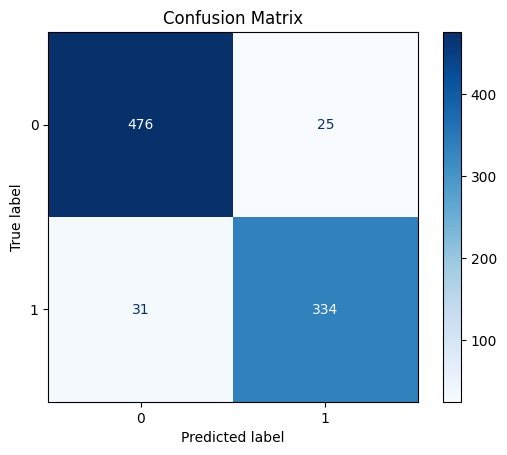

In [7]:
from transformers import AutoTokenizer, AutoModel, AutoConfig, Trainer, TrainingArguments, EarlyStoppingCallback
from transformers.modeling_outputs import SequenceClassifierOutput
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from bnlp import BengaliPOS
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class POSTagEncoder:
    def __init__(self):
        self.pos_tagger = BengaliPOS()
        self.pos_to_id = {
            'PAD': 0, 'UNK': 1, 'CLS': 2, 'SEP': 3,
            'noun': 4, 'verb': 5, 'adjective': 6, 'adverb': 7,
            'pronoun': 8, 'preposition': 9, 'conjunction': 10,
            'interjection': 11, 'determiner': 12, 'punctuation': 13
        }
        self.bnlp_to_coarse = {
            'JJ': 'adjective', 'JQ': 'adjective',
            'NC': 'noun', 'NP': 'noun', 'NST': 'noun', 'NV': 'noun', 'LC': 'noun',
            'VM': 'verb', 'VAUX': 'verb', 'LV': 'verb',
            'PPR': 'pronoun', 'PRL': 'pronoun', 'PRF': 'pronoun', 'PRC': 'pronoun',
            'DAB': 'determiner', 'DRL': 'determiner', 'DWH': 'determiner',
            'CCD': 'conjunction', 'CCL': 'conjunction', 'CSB': 'conjunction',
            'AMN': 'adverb', 'RDS': 'adverb', 'RDF': 'adverb', 'RDX': 'adverb',
            'PWH': 'interjection',
            'CX': 'preposition', 'PP': 'preposition',
            'PU': 'punctuation',
            'ALC': 'UNK', 'CIN': 'UNK'
        }

    def tag_and_align(self, text, tokenizer, max_len):
        words = text.strip().split()
        try:
            tags = self.pos_tagger.tag(" ".join(words))
            coarse_tags = [self.bnlp_to_coarse.get(tag, 'UNK') for _, tag in tags]
        except:
            coarse_tags = ['UNK'] * len(words)

        encoding = tokenizer(
            text, max_length=max_len, padding="max_length",
            truncation=True, return_offsets_mapping=True, add_special_tokens=True
        )

        word_ids = encoding.word_ids()
        pos_ids = []
        for i, word_id in enumerate(word_ids):
            if word_id is None:
                if i == 0: pos_ids.append(self.pos_to_id['CLS'])
                elif encoding['input_ids'][i] == tokenizer.sep_token_id:
                    pos_ids.append(self.pos_to_id['SEP'])
                else: pos_ids.append(self.pos_to_id['PAD'])
            elif word_id < len(coarse_tags):
                pos_ids.append(self.pos_to_id.get(coarse_tags[word_id], self.pos_to_id['UNK']))
            else:
                pos_ids.append(self.pos_to_id['UNK'])
        return encoding, pos_ids

#Improved POS-Aware Model
class ImprovedPOSAwareBanglaBERT(nn.Module):
    def __init__(self, model_name, num_labels=2, pos_vocab_size=14, pos_embed_dim=64):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        hidden_size = self.bert.config.hidden_size
        self.pos_embedding = nn.Embedding(pos_vocab_size, pos_embed_dim)
        self.pos_projection = nn.Linear(pos_embed_dim, hidden_size // 4)
        self.fusion_layer = nn.Linear(hidden_size + hidden_size // 4, hidden_size)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(hidden_size, num_labels)

        nn.init.xavier_uniform_(self.pos_embedding.weight)
        nn.init.xavier_uniform_(self.pos_projection.weight)
        nn.init.zeros_(self.pos_projection.bias)
        nn.init.xavier_uniform_(self.fusion_layer.weight)
        nn.init.zeros_(self.fusion_layer.bias)
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.zeros_(self.classifier.bias)

    def forward(self, input_ids, attention_mask, pos_ids, token_type_ids=None, labels=None):
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=True
        )
        sequence_output = bert_outputs.last_hidden_state
        pos_embeds = self.pos_embedding(pos_ids)
        pos_embeds = self.pos_projection(pos_embeds)
        combined = torch.cat([sequence_output, pos_embeds], dim=-1)
        fused_output = self.fusion_layer(combined)
        fused_output = F.gelu(fused_output)#FT
        fused_output = self.layer_norm(fused_output)
        cls_output = self.dropout(fused_output[:, 0, :])
        logits = self.classifier(cls_output)

        loss = None
        if labels is not None:
            loss = nn.CrossEntropyLoss()(logits, labels)
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=bert_outputs.hidden_states,
            attentions=bert_outputs.attentions,
        )


class POSAwareDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len, pos_encoder):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.pos_encoder = pos_encoder

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding, pos_ids = self.pos_encoder.tag_and_align(self.texts[idx], self.tokenizer, self.max_len)
        item = {
            "input_ids": torch.tensor(encoding["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(encoding["attention_mask"], dtype=torch.long),
            "pos_ids": torch.tensor(pos_ids, dtype=torch.long),
        }
        if "token_type_ids" in encoding:
            item["token_type_ids"] = torch.tensor(encoding["token_type_ids"], dtype=torch.long)
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    
    precision = precision_score(labels, preds, average='macro')
    recall = recall_score(labels, preds, average='macro')
    f1 = f1_score(labels, preds, average='macro')
    accuracy = accuracy_score(labels, preds)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

def print_model_summary(model):
    print(" Model Architecture:\n")
    print(model)

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"\n Total parameters: {total_params}")
    print(f" Trainable parameters: {trainable_params}")
    
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
pos_encoder = POSTagEncoder()
model = ImprovedPOSAwareBanglaBERT(model_name=model_name)
# Dataset creation
train_dataset = POSAwareDataset(X_train.tolist(), y_train.tolist(), tokenizer, 128, pos_encoder)
val_dataset = POSAwareDataset(X_val.tolist(), y_val.tolist(), tokenizer, 128, pos_encoder)
test_dataset = POSAwareDataset(X_test.tolist(), y_test.tolist(), tokenizer, 128, pos_encoder)

training_args = TrainingArguments(
    output_dir="./results/muril_pos_improved_80_final",
    num_train_epochs=15,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs/muril_pos_improved_80_final",
    logging_steps=100,
    eval_strategy="steps",
    eval_steps=300,
    save_strategy="steps",
    save_steps=300,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    weight_decay=0.01,
    learning_rate=1e-5,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    fp16=True,
    report_to=None
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=10)],
)

trainer.train()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Evaluation
print("\n Validation Results:")
val_results = trainer.evaluate()
print(val_results)

print("\n Test Results:")
test_results = trainer.evaluate(test_dataset)
print(test_results)

#  Final report
preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)#np array
y_true = preds.label_ids#np array

print("\n Classification Report:")
print(classification_report(y_true, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**BEST MODEL: MuRIL BERT WITH Parts of Speech(POS) embedding integration with mF1 score 93.35% which is more than vanilla best model's mF1(92)**